In [1]:
import sys
sys.path.append('../src') 
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()
data = preprocess.file_to_df("..\\data\\all_politicians_aggregated.txt")

In [2]:
from political_ads.grouper import Grouper
from political_ads.visualizer import Visualizer

grouper = Grouper()
viz = Visualizer()

republicans = grouper.group_ads_by_party_by_day(data, "Republican")
democrats = grouper.group_ads_by_party_by_day(data, "Democrat")

In [3]:
from political_ads.keyword_filter import Filter

filter = Filter()

climate_ads = filter.get_climate_ads(data) 
non_climate_ads = data[data.apply(lambda x: filter.check_for_NON_climate_ad(str(x["ad_creative_body"])),axis=1)] # returns the rows that return true

In [4]:
republicans_climate = grouper.group_ads_by_party_by_day(climate_ads, "Republican")
democrats_climate = grouper.group_ads_by_party_by_day(climate_ads, "Democrat")

In [5]:
import pandas as pd
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info

# Check distribution of climate ads ratio

In [9]:
# all_climate = grouper.group_ads_by_page(climate_ads)
non_climate = non_climate_ads.groupby("page_id").agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index()

all_climate = climate_ads.groupby("page_id").agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index()

In [10]:
import pandas as pd
merged_climate = pd.merge(left=non_climate, right=all_climate, on="page_id", how="inner")

def add_up(x):
    return 100 * (x["no_ads_y"]/(x["no_ads_y"] + x["no_ads_x"]))

merged_climate["climate_ad_ratio"] = merged_climate.apply(lambda x: add_up(x), axis=1)

merged_climate.sort_values(by="climate_ad_ratio", ascending=False)

,page_id,no_ads_x,sum_spend_lo_x,sum_spend_hi_x,median_spend_x,avg_spend_x,sum_impressions_lo_x,sum_impressions_hi_x,avg_impressions_x,no_ads_y,sum_spend_lo_y,sum_spend_hi_y,median_spend_y,avg_spend_y,sum_impressions_lo_y,sum_impressions_hi_y,avg_impressions_y,climate_ad_ratio
111,58080781287,22,300,2478,49.5,1389.0,28000,53978,40989.0,50,6900,12650,49.5,9775.0,218000,288950,253475.0,69.444444
39,1667702233477156,72,26400,38028,49.5,32214.0,1955000,2361928,2158464.0,49,10400,16051,49.5,13225.5,482000,600951,541475.5,40.495868
134,7801901317,135,48400,70665,49.5,59532.5,3781000,4517865,4149432.5,80,3900,12220,49.5,8060.0,48000,135920,91960.0,37.209302
88,344330745672593,78,9400,17922,49.5,13661.0,331000,468922,399961.0,44,1500,5856,49.5,3678.0,38000,85956,61978.0,36.065574
62,211797415586435,9,1500,2791,149.5,2145.5,141000,166991,153995.5,3,1400,1697,649.5,1548.5,122000,142997,132498.5,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1012679305536045,614,256800,365386,149.5,311093.0,15936000,19194386,17565193.0,1,1000,1499,1249.5,1249.5,100000,124999,112499.5,0.162602
126,6817812700,678,181700,276122,49.5,228911.0,12006000,14650322,13328161.0,1,200,299,249.5,249.5,15000,19999,17499.5,0.147275
110,57495285387,9110,918400,1932390,49.5,1425395.0,29436000,42712890,36074445.0,13,2600,4287,149.5,3443.5,37000,53987,45493.5,0.142497
106,485980975070908,1608,397200,617092,49.5,507146.0,21127000,26068392,23597696.0,2,400,598,249.5,499.0,20000,29998,24999.0,0.124224


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=pages, x="no_ads", kind="kde", palette="bright", color="blue")

NameError: name 'pages' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data=merged_climate, x="climate_ad_ratio", kind="kde", palette="bright", color="blue")
# THIS PLOT ONLY INCLUDES THE POLITICIANS THAT DO HAVE CLIMATE ADS! n=153

In [ ]:
plt.figure(figsize=(18,12))
sns.displot(merged_climate["climate_ad_ratio"], kde=False, color='blue', bins=80)
plt.ylabel("Number of politicians")
plt.xlabel("Share of climate ads to all ads (%)")
plt.xlim([0,70])
# plt.savefig("..\\plots\\ad_distribution.pdf")
plt.show()

# Get top spender overall and for climate ads
 

In [12]:
'''
Get pages and their no of ads with the party they belong to
FOR CLIMATE ADS
'''

import seaborn as sns
import matplotlib.pyplot as plt
# PLOT NO OF PEOPLE AND THEIR SHARE OF CLIMATE ADS VS TOTAL ADS

page_all_climate = climate_ads.groupby(["page_name", "page_id"]).agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index().sort_values(by="no_ads", ascending=False)

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
        # Check if available
page_all_climate["party"] = page_all_climate["page_id"].apply(lambda x: congress[congress["page_id"] == x]["party"].values[0]) # add party to pages

page_all_climate.sort_values(by="sum_spend_hi", ascending=False, inplace=True)
page_all_climate.head(1)

,page_name,page_id,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions,party
6,Alexandria Ocasio-Cortez,1316372698453411,3303,166600,519297,49.5,342948.5,9969000,14703697,12336348.5,Democrat


In [13]:
'''
Get pages and their no of ads with the party they belong to
FOR ALL ADS
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# PLOT NO OF PEOPLE AND THEIR SHARE OF CLIMATE ADS VS TOTAL ADS

page_all = data.groupby(["page_name", "page_id"]).agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index().sort_values(by="no_ads", ascending=False)

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
        # Check if available
page_all["party"] = page_all["page_id"].apply(lambda x: congress[congress["page_id"] == x]["party"].values[0] if congress["page_id"].str.contains(x).any() else "not_available") # add party to pages

In [14]:
'''
Function for nice axis dollar formatting
'''
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

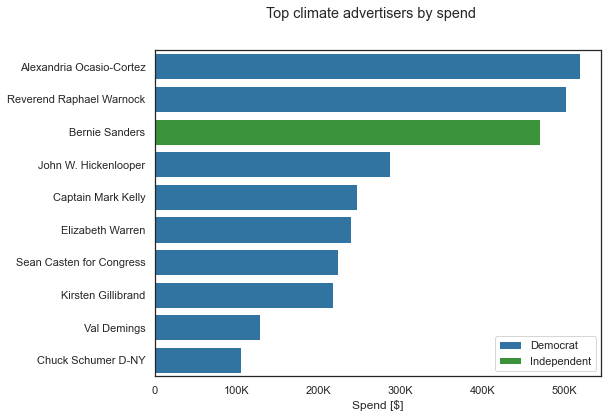

In [17]:
'''
Climate advertisers
'''
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick


# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

palette = {"Democrat":"tab:blue",
           "Republican":"tab:red", 
           "Independent":"tab:green"}
# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all_climate[:10]["sum_spend_hi"], y=page_all_climate[:10]["page_name"],
             color="b", hue=page_all_climate[:10]["party"], palette=palette, dodge=False)
f.suptitle("Top climate advertisers by spend")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
# ax.set(xlim=(3.9, 4.3), ylabel="",
#        xlabel="")
plt.xlabel("Spend [$]")
plt.ylabel("")

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

f.savefig("..\\plots\\top politicians\\top_CLIMATE_advertisers_by_spend.pdf", bbox_inches="tight")

In [18]:
page_all.sort_values(by="sum_spend_hi", ascending=False, inplace=True)
page_all.head(1)

,page_name,page_id,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions,party
39,Bernie Sanders,124955570892789,70411,11172400,20100289,49.5,15636344.5,723188000,892867671,808027835.5,Independent


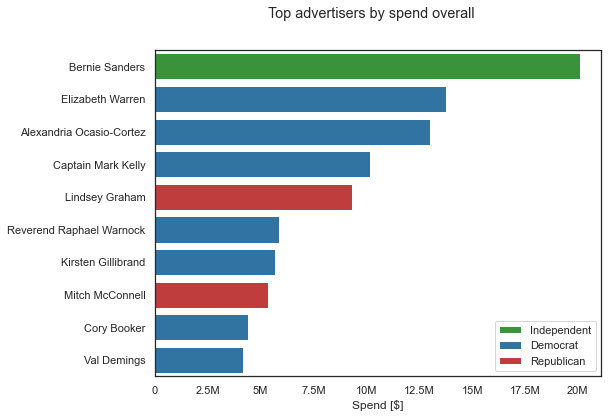

In [19]:
'''
All advertisers top 10
'''
import matplotlib.ticker as tick
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

palette = {"Democrat":"tab:blue",
           "Republican":"tab:red", 
           "Independent":"tab:green"}
# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all[:10]["sum_spend_hi"], y=page_all[:10]["page_name"],
             color="b", hue=page_all[:10]["party"], palette=palette, dodge=False)
f.suptitle("Top advertisers by spend overall")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)

plt.xlabel("Spend [$]")
plt.ylabel("")

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

f.savefig("..\\plots\\top politicians\\top_OVERALL_advertisers_by_spend.pdf", bbox_inches="tight")

In [ ]:
page_all["party"].value_counts()

In [38]:
republicans_climate["ad_creation_time"][0]

Timestamp('2018-06-05 00:00:00')

# Time series plots

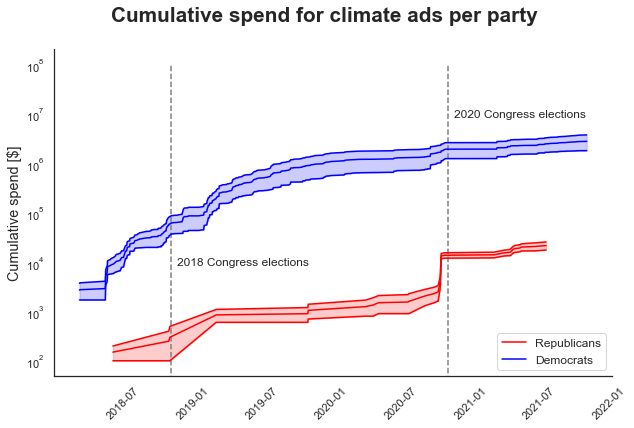

In [72]:
# As input needs dataframe containing the advertisements GROUPED BY DAY!
# Can be done for individual politicians or even groups like reps or dems        # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
sns.set_theme(style="white")
import matplotlib.ticker as tick
from datetime import datetime
from matplotlib.pyplot import text


df_1 = republicans_climate
days = df_1.ad_creation_time
lower = df_1.sum_spend_lo.cumsum()
average = df_1.avg_spend.cumsum()
upper = df_1.sum_spend_hi.cumsum()

title = f'Cumulative spend for climate ads per party'

fig, ax1 = plt.subplots(figsize = (10,6))

fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax1.plot(days, upper, label = 'Republicans', color="red")
ax1.plot(days, average, color="red")
ax1.plot(days, lower, color="red")
ax1.set_ylabel('Cumulative spend [$]', fontsize = 'large')
# ax1.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.fill_between(days, lower, upper, alpha=0.2, color="red")

# Second plot
df_2 = democrats_climate
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_spend_lo.cumsum()
average_2 = df_2.avg_spend.cumsum()
upper_2 = df_2.sum_spend_hi.cumsum()

ax1.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax1.plot(days_2, average_2, color="blue")
ax1.plot(days_2, lower_2,color="blue")
ax1.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax1.legend(
                loc = 'lower right',
                frameon = True,
                fontsize = 'medium')
                
plt.xticks(rotation = 45) # Rotates X-ax1is Ticks by 45-degrees

# ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

# Add vertical lines
plt.vlines(x=pd.Timestamp('2018-11-06 00:00:00'), ymin=0, ymax=100000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2018-11-20 00:00:00'), 10000, "2018 Congress elections", rotation=360, verticalalignment='center')

plt.vlines(x=pd.Timestamp('2020-11-03 00:00:00'), ymin=0, ymax=100000000, color = 'grey', linestyles="dashed")
text(pd.Timestamp('2020-11-20 00:00:00'), 10000000, "2020 Congress elections", rotation=360, verticalalignment='center')


plt.yscale("log")
plt.show()
fig.savefig("..\\plots\\climate_both_spend.pdf")

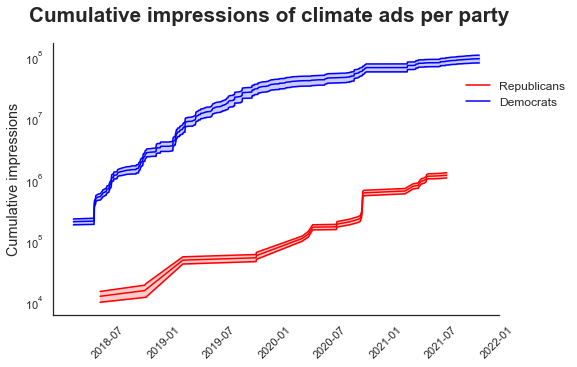

In [27]:
 # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
        # This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
        # df_c = u5mr_df.loc[([country]), :]
import matplotlib.pyplot as plt
sns.set_theme(style="white")

df_c = republicans_climate
days = df_c.ad_creation_time
lower = df_c.sum_impressions_lo.cumsum()
average = df_c.avg_impressions.cumsum()
upper = df_c.sum_impressions_hi.cumsum()

title = f'Cumulative impressions of climate ads per party'

fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax.plot(days, upper, label = 'Republicans', color="red")
ax.plot(days, average, color="red")
ax.plot(days, lower, color="red")  

ax.set_ylabel('Cumulative impressions', fontsize = 'large')
# ax.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(days, lower, upper, alpha=0.2, color="red")


# Second plot
df_2 = democrats_climate
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_impressions_lo.cumsum()
average_2 = df_2.avg_impressions.cumsum()
upper_2 = df_2.sum_impressions_hi.cumsum()

ax.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax.plot(days_2, average_2, color="blue")
ax.plot(days_2, lower_2,color="blue")
ax.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax.legend(bbox_to_anchor = (0.9, 0.9),
                loc = 'upper left',
                frameon = False,
                fontsize = 'medium')

plt.yscale("log")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()
fig.savefig("..\\plots\\climate_both_impressions.pdf")